In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df.iloc[df['t'].idxmin()], df.iloc[df['t'].idxmax()]

(Day    2010-02-20 00:00:00
 t                      -23
 Name: 780, dtype: object, Day    2010-08-07 00:00:00
 t                       34
 Name: 948, dtype: object)

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [5]:
from copy import copy
df['month'] = df.Day.dt.month
df['year'] = df.Day.dt.year
df['day'] = df.Day.dt.day
dff = copy(df);
dff['t'] = dff['t'].apply(lambda x: 1 if x>=0 else 0)
group = dff[dff['month']==1].groupby('year').sum()
group['t'].idxmax()

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [6]:
dff = copy(df);
mapper = {1:0,2:0,3:0,4:0,5:0,6:1,7:1,8:1,9:0,10:0,11:0,12:0}
dff['month'] = dff['month'].map(mapper)
dff[dff['month']==1].groupby('year').mean()['t'].idxmin()

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [7]:
dff = copy(df);
first = dff.drop([len(dff)-1], axis=0)
last = dff.drop([0], axis=0)
first.index = range(len(first))
last.index = range(len(last))
dff.iloc[(first.t - last.t).apply(lambda x: abs(x)).idxmax()]

Day      2014-05-26 00:00:00
t                         22
month                      5
year                    2014
day                       26
Name: 2334, dtype: object

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

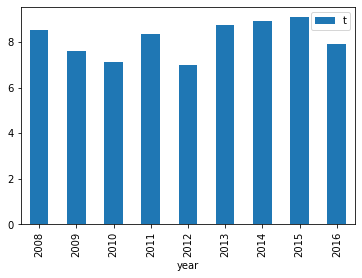

In [82]:
dff = copy(df);
dff.groupby('year').mean().drop(['month', 'day'], axis=1).plot.bar()